In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import regularizers

import os

batch_size = 32
num_classes = 10
max_epochs = 80
input_shape = (160, 160, 3)
weight_decay = 0.0005


save_dir = '/home/ec2-user/Telecom/experiments/saved_models'
model_name = 'keras_cnn_imagenette_trained_model.h5'
model_path = os.path.join(save_dir, model_name)
train_path = '/home/ec2-user/Telecom/experiments/data/imagenette2-320/train'
test_path = '/home/ec2-user/Telecom/experiments/data/imagenette2-320/val'

# The data, split between train and test sets:
train_datagen = ImageDataGenerator(
        rescale=1./255,    
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(160, 160),
        batch_size=32,
        class_mode='categorical')



model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

sgd = keras.optimizers.SGD(lr=0.001, decay=lr_decay, momentum=0.9, nesterov=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=0)

early_stop = keras.callbacks.callbacks.EarlyStopping(monitor='val_accuracy', 
                                                     min_delta=0, 
                                                     patience=8, 
                                                     verbose=0, 
                                                     mode='auto', 
                                                     baseline=None, 
                                                     restore_best_weights=False)

Using TensorFlow backend.


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [12]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True)


model.fit_generator(
          train_generator,
          epochs=max_epochs,
          validation_data=validation_generator,
          steps_per_epoch = 300,
          validation_steps = 150,
          verbose = 1,
          callbacks=[model_checkpoint]
)


from matplotlib import pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/80
300/300 [==============================] - 76s 254ms/step - loss: 4.2350 - accuracy: 0.2322 - val_loss: 2.2758 - val_accuracy: 0.3051

Epoch 00001: loss improved from inf to 4.23553, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 2/80
300/300 [==============================] - 73s 242ms/step - loss: 2.1636 - accuracy: 0.3418 - val_loss: 2.1341 - val_accuracy: 0.3773

Epoch 00002: loss improved from 4.23553 to 2.16366, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 3/80
300/300 [==============================] - 73s 242ms/step - loss: 1.9072 - accuracy: 0.4017 - val_loss: 2.2084 - val_accuracy: 0.3723

Epoch 00003: loss improved from 2.16366 to 1.90716, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 4/80
300/300


Epoch 00028: loss improved from 1.03270 to 1.02199, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 29/80
300/300 [==============================] - 73s 243ms/step - loss: 1.0036 - accuracy: 0.7285 - val_loss: 0.9837 - val_accuracy: 0.7029

Epoch 00029: loss improved from 1.02199 to 1.00354, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 30/80
300/300 [==============================] - 73s 244ms/step - loss: 1.0059 - accuracy: 0.7294 - val_loss: 0.7297 - val_accuracy: 0.7100

Epoch 00030: loss did not improve from 1.00354
Epoch 31/80
300/300 [==============================] - 73s 243ms/step - loss: 0.9895 - accuracy: 0.7359 - val_loss: 0.8697 - val_accuracy: 0.7031

Epoch 00031: loss improved from 1.00354 to 0.98943, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 32/80
300/300 [============================

KeyboardInterrupt: 

In [3]:
# restart training
from keras.models import load_model
model_checkpoint = ModelCheckpoint(model_path, monitor='loss', verbose=1, save_best_only=True)

model = load_model(model_path)
model.fit_generator(
          train_generator,
          epochs=15,
          validation_data=validation_generator,
          steps_per_epoch = 300,
          validation_steps = 150,
          verbose = 1,
          callbacks=[model_checkpoint]
)

Epoch 1/15
300/300 [==============================] - 76s 254ms/step - loss: 0.8216 - accuracy: 0.7889 - val_loss: 0.9054 - val_accuracy: 0.7611

Epoch 00001: loss improved from inf to 0.82165, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 2/15
300/300 [==============================] - 73s 242ms/step - loss: 0.8104 - accuracy: 0.7867 - val_loss: 0.9560 - val_accuracy: 0.7519

Epoch 00002: loss improved from 0.82165 to 0.81039, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 3/15
300/300 [==============================] - 73s 242ms/step - loss: 0.8089 - accuracy: 0.7909 - val_loss: 1.1387 - val_accuracy: 0.7189

Epoch 00003: loss improved from 0.81039 to 0.80902, saving model to /home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5
Epoch 4/15
300/300 [==============================] - 72s 241ms/step - loss: 0.8144 - accuracy: 0.7855 -

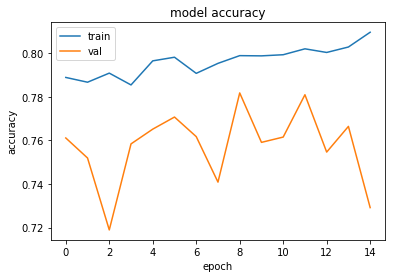

In [7]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
from keras.models import load_model
model = load_model('/home/ec2-user/Telecom/experiments/saved_models/keras_cnn_imagenette_trained_model.h5')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 160, 160, 32)      896       
_________________________________________________________________
activation_74 (Activation)   (None, 160, 160, 32)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 158, 158, 32)      9248      
_________________________________________________________________
activation_75 (Activation)   (None, 158, 158, 32)      0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 79, 79, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 79, 79, 64)       